---
title:  "Neuralnet Basic 06"
excerpt: "Basic Neural Net using numpy,tensor-flow,keras"

categories:
  - Deep-Learning
tags:
  - DL
  - Neuralnet Using keras
  - KEARS 창시자에게 배우는 딥러닝
  - 딥러닝
last_modified_at: 2020-03-06T18:06:00-05:00
---

KEARS 창시자에게 배우는 딥러닝 - 3장 -01 이진분류문제
> Basic 03 에서, 사용한, 간단한 영화리뷰에 대해서 좀더 Neural Net 의 일반화 기법을 알아본다.  
> 핵심은 과적합(overfitting) 피하기 이다.
> [책 관련 Blog 로 이동](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EC%B0%BD%EC%8B%9C%EC%9E%90%EC%97%90%EA%B2%8C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D/)

In [1]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
import keras
keras.__version__

'2.2.4'

In [3]:
from keras.datasets import imdb
## num_words=10000 는 훈련데이터에서, 자주 사용하는 단어 1만개만 사용하겠다는 의미임
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### --------------------------------**데이터 내용 파악 start**--------------------------------------------------

In [4]:
print("train_data.shape",train_data.shape)
print("train_labels.shape",train_labels.shape)
print("test_data.shape",test_data.shape)
print("test_labels",test_labels.shape)

train_data.shape (25000,)
train_labels.shape (25000,)
test_data.shape (25000,)
test_labels (25000,)


__언뜻 보기엔 2D tensor 같지만, np.array로 1개의 벡터 안에, 원소가 list 형태임. 이대로는 keras 모델에 집어넣을 수 없음__

In [5]:
print(type(train_data))
print(train_data.ndim) ## 1D tensor

<class 'numpy.ndarray'>
1


In [6]:
train_data[12].ndim

AttributeError: 'list' object has no attribute 'ndim'

In [11]:
print(len(train_data[12]))
print(type(train_data[12]))
train_data[12][0:10] ## 25번째 데이터의 구성을 보면, 총 142개의 단어로 되어 있고, 0~9번째까지의 단어는 하기와 같다.

117
<class 'list'>


[1, 13, 119, 954, 189, 1554, 13, 92, 459, 48]

In [12]:
print(len(train_data[25]))
train_data[25][0:10] ## 25번째 데이터의 구성을 보면, 총 142개의 단어로 되어 있고, 0~9번째까지의 단어는 하기와 같다.

142


[1, 14, 9, 6, 55, 641, 2854, 212, 44, 6]

In [13]:
max([max(sequence) for sequence in train_data]) ## num_words=10000 제한이 없었으면, 88586 단어의 데이터가 존재한다

9999

In [14]:
for line_idx in range(0,len(train_data)):
    if (line_idx%5000)==0:
        print(len(train_data[line_idx]))
## 보시다시피, 각 train_data 라인당 모두 길이가 다르다

218
124
118
281
252


### --------------------------------**데이터 내용 파악 end**--------------------------------------------------

신경망에는 list를 input data로 활용할수없기때문에, vector 로 바꾼다. 
이때, Embedding 이나, one-hotencoding을 사용하는데, 여기서는 one-hotencoding을 활용한다.

In [15]:
print("train_data.shape",train_data.shape)
print("test_data.shape",test_data.shape)

train_data.shape (25000,)
test_data.shape (25000,)


앞서 언급했듯이, 현재는 1D tensor 이기에, 이대로는 넣을 수 없다. 따라서, 2D tensor , ndim=2, np.array type 으로 바꿔줘야 한다.

In [16]:
import numpy as np

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

__과적합 피하기__

__원본 네트워크__

In [18]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


__node 를 줄인 작은 네트워크 모델__

In [19]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [20]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 180us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8835
Epoch 2/20
25000/25000 [==============================] - 3s 140us/step - loss: 0.2573 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1991 - acc: 0.9292 - val_loss: 0.2821 - val_acc: 0.8891
Epoch 4/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.1666 - acc: 0.9412 - val_loss: 0.2939 - val_acc: 0.8844
Epoch 5/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1435 - acc: 0.9501 - val_loss: 0.3116 - val_acc: 0.8804
Epoch 6/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.1257 - acc: 0.9558 - val_loss: 0.3483 - val_acc: 0.8721
Epoch 7/20
25000/25000 [==============================] - 4s 145us/step - 

In [21]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 153us/step - loss: 0.5670 - acc: 0.7410 - val_loss: 0.4849 - val_acc: 0.8256
Epoch 2/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.3924 - acc: 0.8895 - val_loss: 0.3609 - val_acc: 0.8780
Epoch 3/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.2791 - acc: 0.9174 - val_loss: 0.3012 - val_acc: 0.8879
Epoch 4/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.2213 - acc: 0.9278 - val_loss: 0.2823 - val_acc: 0.8900
Epoch 5/20
25000/25000 [==============================] - 4s 150us/step - loss: 0.1877 - acc: 0.9375 - val_loss: 0.2816 - val_acc: 0.8863
Epoch 6/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.1649 - acc: 0.9448 - val_loss: 0.2858 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 4s 144us/step - loss: 0.1467 - acc: 0.9518 - val_loss: 0.2954 - 

In [22]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [23]:
import matplotlib.pyplot as plt

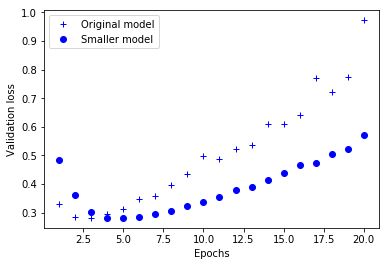

In [24]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

오리지널 보다, node 가 더 적게 학습된 모델이, validation loss 수렴이 좀 더 늦게 이루짐을 알 수 있다.  
오리지널은 4에서부터, 다시금 loss 값이 증가하는데,  
node가 적읍 변형모델은 epoch 6 정도에서부터, loss 가 증가하고, 그렇게 가파르지도 않다.  
node 가 더 많을 수록, 좀 더 과적합되기 쉽다는 것을 보여준다.

__node 를 확 늘린 큰 네트워크 모델__

In [25]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [ ]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 204us/step - loss: 0.5525 - acc: 0.7891 - val_loss: 0.2816 - val_acc: 0.8851
Epoch 2/20
25000/25000 [==============================] - 5s 184us/step - loss: 0.2181 - acc: 0.9138 - val_loss: 0.3308 - val_acc: 0.8698
Epoch 3/20
25000/25000 [==============================] - 5s 186us/step - loss: 0.1150 - acc: 0.9600 - val_loss: 0.3660 - val_acc: 0.8836
Epoch 4/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.0939 - acc: 0.9806 - val_loss: 0.4565 - val_acc: 0.8849
Epoch 5/20
25000/25000 [==============================] - 5s 184us/step - loss: 0.1066 - acc: 0.9867 - val_loss: 0.4866 - val_acc: 0.8824
Epoch 6/20
25000/25000 [==============================] - 5s 189us/step - loss: 0.0726 - acc: 0.9870 - val_loss: 0.4781 - val_acc: 0.8803
Epoch 7/20
25000/25000 [==============================] - 5s 194us/step - loss: 5.9183e-04 - acc: 1.0000 - val_loss: 0.635

In [ ]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

훨씬 더 많은 node 를(이른바 네트워크 용량을 증가시켰을때) 사용한 모델은 빠르게 loss 값이 감소하나, 더 쉽게 빨리 과대적합이 일어난다.

[keras 개념설명 blog](https://tykimos.github.io/2017/01/27/Keras_Talk/)

여기서 keras 를 통해 볼것은 규제추가(정규화) 와 Drop out 이다.

In [ ]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [ ]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

상세한 설명은 생략한다.